In [2]:
import  pandas as pd
df = pd.read_csv(r"D:\Recommendation_system\online_course_recommendation_v2.csv")


In [3]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,5006.863560,52.38354,3.959859,25052.822850,261.073369,0.746865,20.691054,4.992670
std,14406.960108,2882.085456,27.42347,0.729958,14388.188356,139.013758,0.143683,13.669148,2.237259
min,1.000000,1.000000,5.00000,1.000000,50.000000,20.000000,0.092000,1.000000,0.000000
25%,12487.750000,2523.000000,28.60000,3.500000,12583.750000,140.100000,0.649000,9.900000,3.000000
50%,24793.500000,5012.000000,52.40000,4.000000,25057.500000,262.310000,0.750000,19.920000,5.000000
75%,37382.250000,7502.000000,76.10000,4.500000,37522.000000,381.702500,0.851000,30.080000,6.000000
max,49999.000000,9999.000000,100.00000,5.000000,49999.000000,500.000000,1.000000,84.150000,19.000000


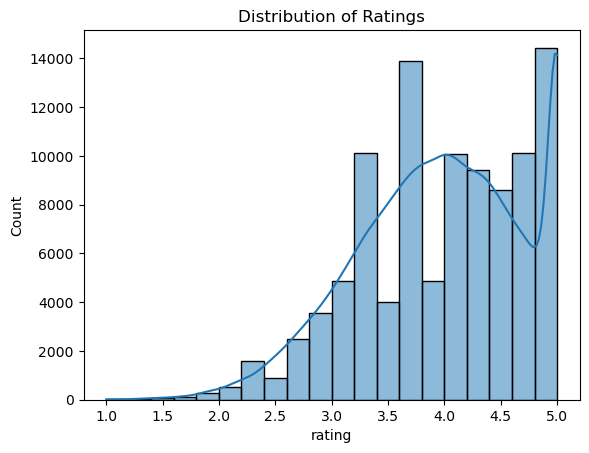

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['rating'], kde=True, bins=20)
plt.title("Distribution of Ratings")
plt.show()



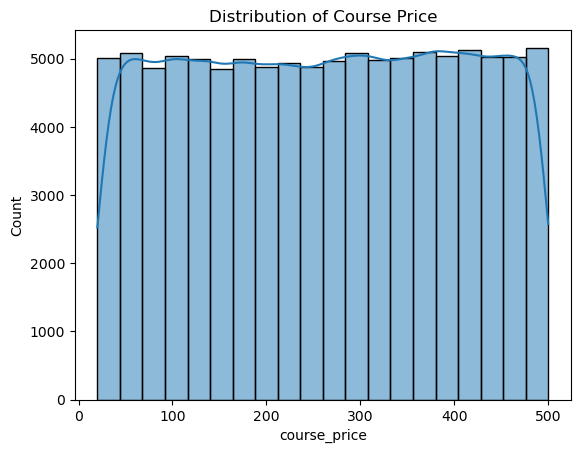

In [6]:

sns.histplot(df['course_price'], kde=True, bins=20)
plt.title("Distribution of Course Price")
plt.show()


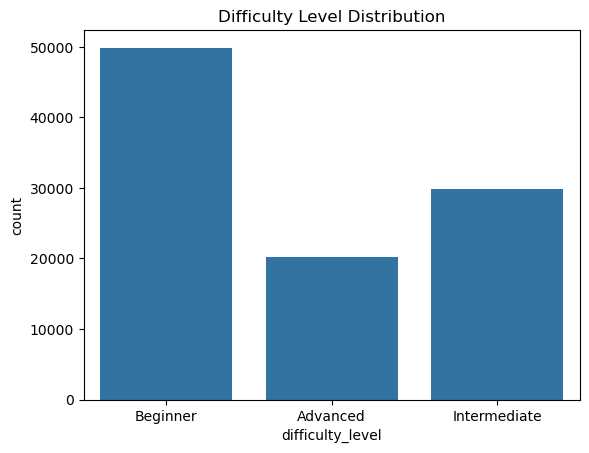

In [7]:
sns.countplot(x=df['difficulty_level'])
plt.title("Difficulty Level Distribution")
plt.show()


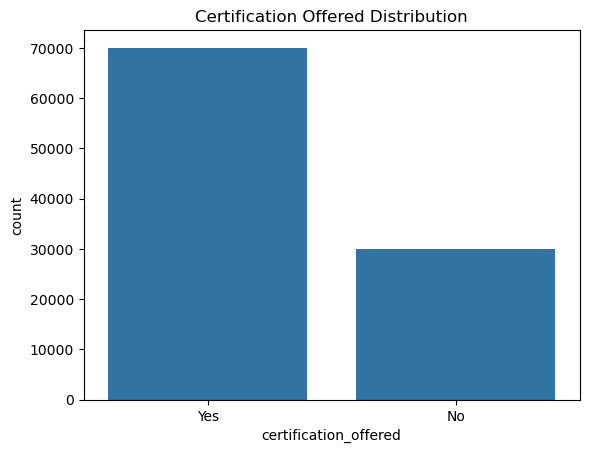

In [8]:
sns.countplot(x=df['certification_offered'])
plt.title("Certification Offered Distribution")
plt.show()


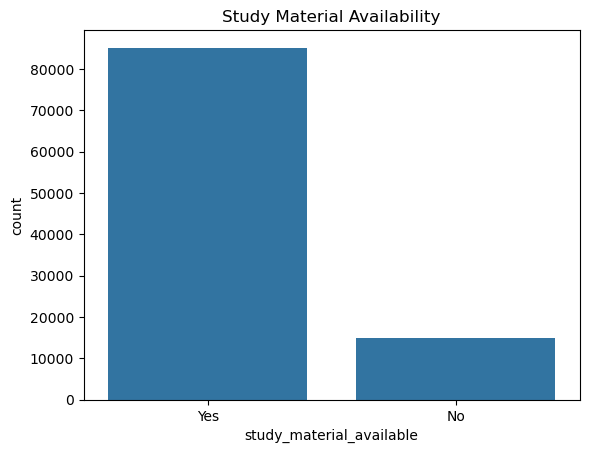

In [9]:
sns.countplot(x=df['study_material_available'])
plt.title("Study Material Availability")
plt.show()


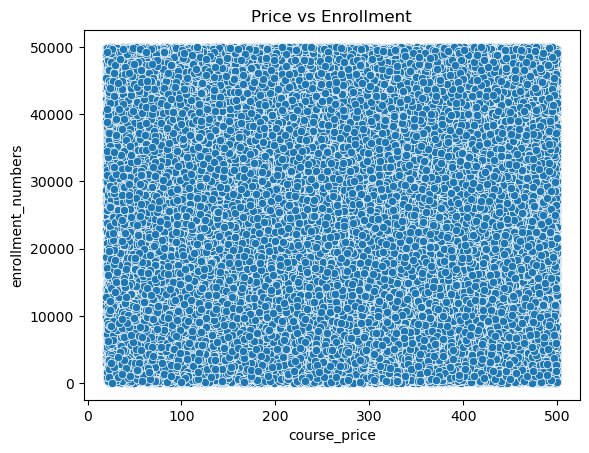

In [10]:
sns.scatterplot(x=df['course_price'], y=df['enrollment_numbers'])
plt.title("Price vs Enrollment")
plt.show()


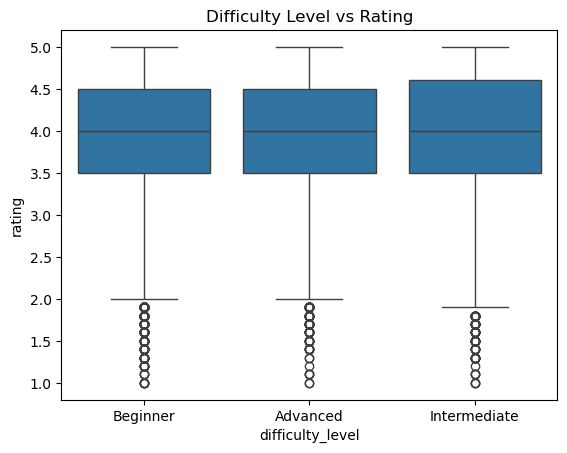

In [11]:
sns.boxplot(x=df['difficulty_level'], y=df['rating'])
plt.title("Difficulty Level vs Rating")
plt.show()


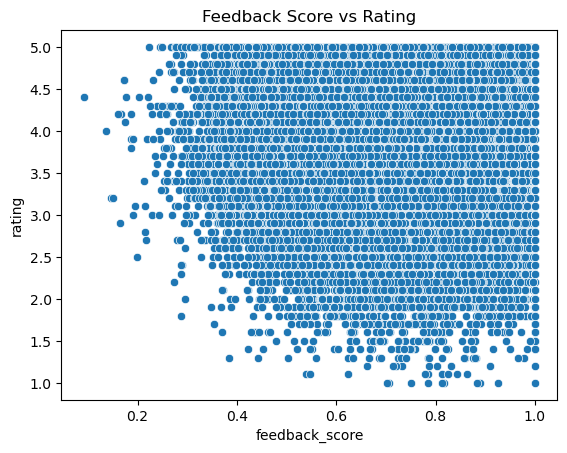

In [12]:
sns.scatterplot(x=df['feedback_score'], y=df['rating'])
plt.title("Feedback Score vs Rating")
plt.show()


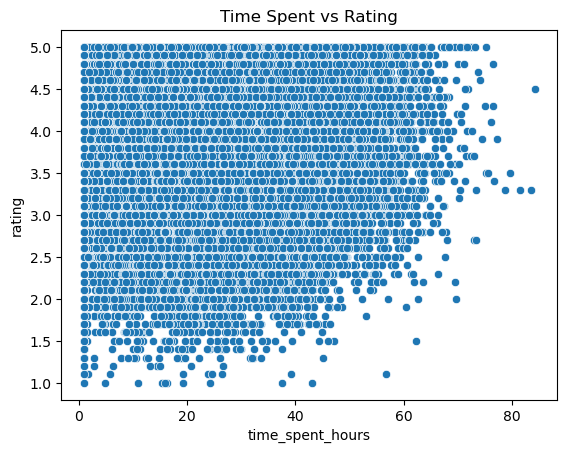

In [13]:
sns.scatterplot(x=df['time_spent_hours'], y=df['rating'])
plt.title("Time Spent vs Rating")
plt.show()


In [14]:
df['certification_offered'] = df['certification_offered'].map({'Yes': 1, 'No': 0})
df['study_material_available'] = df['study_material_available'].map({'Yes': 1, 'No': 0})


In [15]:
df['difficulty_level'] = df['difficulty_level'].map({
    'Beginner': 0,
    'Intermediate': 1,
    'Advanced': 2
})


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['instructor'] = le.fit_transform(df['instructor'])


In [ ]:
# ----------------------------
# 3. Handle Missing Values
# ----------------------------
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
# ----------------------------
# 5. Data Scaling
# ----------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['course_price', 'enrollment_numbers', 'feedback_score', 'time_spent_hours', 'rating']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# ----------------------------
# 6. Feature Engineering
# ----------------------------

# Price per hour
df['price_per_hour'] = df['course_price'] / (df['time_spent_hours'] + 1)

# Engagement score
df['engagement_score'] = df['enrollment_numbers'] * df['rating']

# Interaction feature
df['feedback_rating_interaction'] = df['feedback_score'] * df['rating']

print(df.head())


<Axes: >

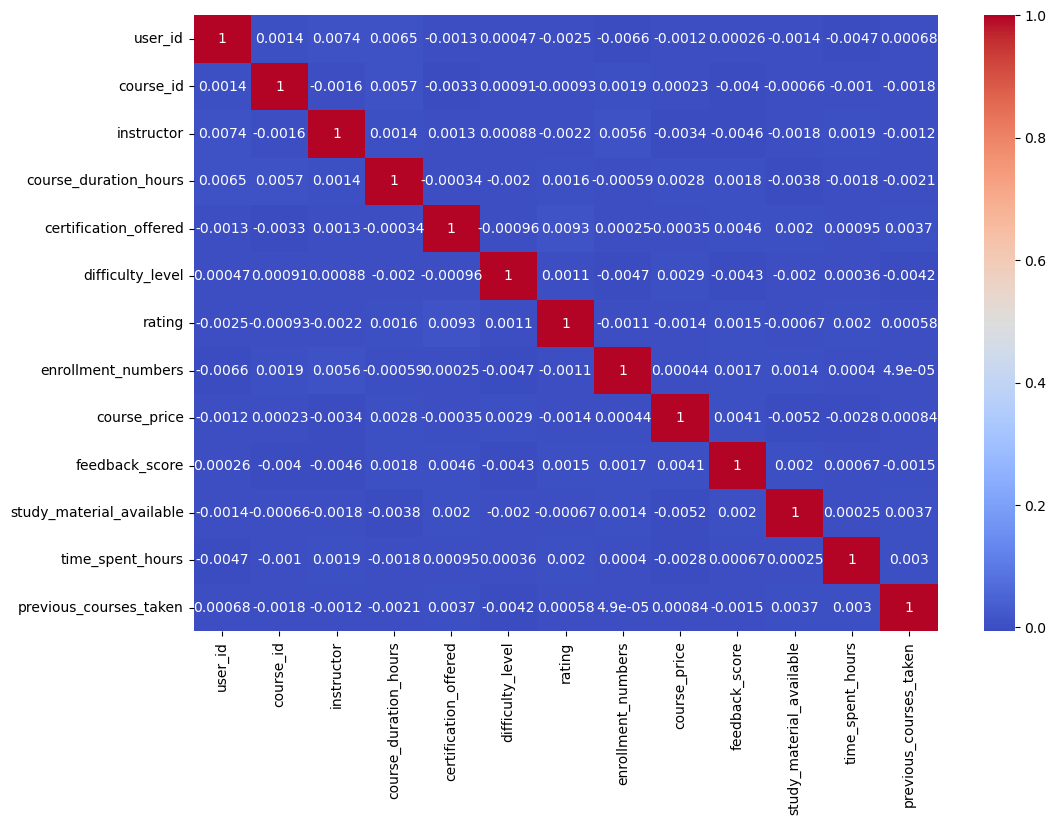

In [17]:
plt.figure(figsize=(12, 8))  
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

